# Analysis

In [1]:
#Importing library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import datetime

from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Importing dataset

df = pd.read_csv("dataset/train.csv")

A little overview

In [3]:
df.head(3)

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22


Statistical description

In [4]:
df.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,523021.000000,523021.000000,523021.000000,523021.000000,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,...,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000
mean,1373.953914,0.029718,0.829714,0.383292,8002.71122,5.713151,259.325073,4057.377536,12381.265718,14050.547848,...,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096
std,216.395820,0.169808,0.375884,0.486189,11537.70753,3.357190,185.857102,2729.630381,9140.692427,2755.425404,...,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193
min,1000.000000,0.000000,0.000000,0.000000,47.00000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.00000,3.000000,166.000000,2573.000000,7215.000000,11849.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,75.000000
50%,1373.000000,0.000000,1.000000,0.000000,3321.00000,6.000000,251.000000,4020.000000,9643.000000,15017.000000,...,11.000000,11.000000,11.000000,4.000000,51.000000,1013.000000,7.000000,8.000000,0.000000,191.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.00000,9.000000,345.000000,5538.000000,15566.000000,15931.000000,...,16.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,250.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.00000,10.000000,2206.000000,26641.000000,32221.000000,23931.000000,...,30.000000,31.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,31.000000,58.930000,360.000000


The dimension of the dataframe

In [5]:
df.shape
n_instances, n_features = df.shape

So, there are **36** features and **523021** instances

## Features

The features are: 


 * **StoreID** : Store ID,
 * **Date** : Observation Date,
 * **IsHoliday** : Regional Holiday,
 * **IsOpen** : Store Open,
 * **HasPromotions** : The Store is currently running promotions,
 * **StoreType** : Type of Store (Standard Market, Super Market, Hyper Market, Shopping Centre),
 * **AssortmentType** : Type of Products (General, With Fish Department, With Non-Food Department),
 * **NearestCompetitor** : Distance (meters) to the nearest competitor store,
 * **Region** : Region ID ,
 * **NumberOfCustomers** : Number of Customer,
 * **NumberOfSales** :Number of Products Sold **(Target Value)**,
 * **Region_AreaKM2** : Region Size in which the Store is located (Km<sup>2</sup>),
 * **Region_GDP** : Region Gross Domestic Product,
 * **Region_PopulationK** : Region Population Size (k),
 * **CloudCover** : LevelofCovering(0-9),
 * **Events** : Meteorological event,
 * **Max_Dew_PointC** : Max Dew Point (Celsius),
 * **Max_Gust_SpeedKm_h** : Max Gust Speed (Km/h),
 * **Max_Humidity** : Max Humidity, 
 * **Max_Sea_Level_PressurehPa** : Max Pressure (hPa),
 * **Max_TemperatureC** : Max Temperature (Celsius),
 * **Max_VisibilityKm** : Max Visibility (Km),
 * **Max_Wind_SpeedKm_h** : Max Wind Speed (Km/h),
 * **Mean_Dew_PointC** : Mean Dew Point (Celsius),
 * **Mean_Humidity** : Mean Humidity,
 * **Mean_Sea_Level_PressurehPa** : Mean Pressure (hPa),
 * **Mean_TemperatureC** : Mean Temperature (Celsius),
 * **Mean_VisibilityKm** : Mean Visibility (Km),
 * **Mean_Wind_SpeedKm_h** : Mean Window Speed (Km/h),
 * **Min_Dew_PointC** : Min Dew Point (Celsius),
 * **Min_Humidity** : Min Humidity,
 * **Min_Sea_Level_PressurehPa** : Min Pressure (hPa),
 * **Min_TemperatureC** : Min Temperature (Celsius),
 * **Min_VisibilitykM** : Min Visibility (Km),
 * **Precipitationmm** : Precipitation Amount (mm),
 * **WindDirDegrees** : Window Direction (degrees).
 
 

In [6]:
categorical_variables_mask = df.dtypes==object
categorical_variables = df.columns[categorical_variables_mask]
numerical_variables = df.columns[~categorical_variables_mask]
print(numerical_variables)
print(categorical_variables)
print("%d Categorical Variables\n%d Numerical Variables\n"%(len(categorical_variables),len(numerical_variables)))

Index(['StoreID', 'IsHoliday', 'IsOpen', 'HasPromotions', 'NearestCompetitor',
       'Region', 'NumberOfCustomers', 'NumberOfSales', 'Region_AreaKM2',
       'Region_GDP', 'Region_PopulationK', 'CloudCover', 'Max_Dew_PointC',
       'Max_Gust_SpeedKm_h', 'Max_Humidity', 'Max_Sea_Level_PressurehPa',
       'Max_TemperatureC', 'Max_VisibilityKm', 'Max_Wind_SpeedKm_h',
       'Mean_Dew_PointC', 'Mean_Humidity', 'Mean_Sea_Level_PressurehPa',
       'Mean_TemperatureC', 'Mean_VisibilityKm', 'Mean_Wind_SpeedKm_h',
       'Min_Dew_PointC', 'Min_Humidity', 'Min_Sea_Level_PressurehPa',
       'Min_TemperatureC', 'Min_VisibilitykM', 'Precipitationmm',
       'WindDirDegrees'],
      dtype='object')
Index(['Date', 'StoreType', 'AssortmentType', 'Events'], dtype='object')
4 Categorical Variables
32 Numerical Variables



## Missing values

The numbers of null values for each columns is:

In [7]:
#Only features with missing values, the others are omitted
missing_values = round(df.isnull().sum() / n_instances * 100, 3)
features_with_missings = missing_values.drop(missing_values[missing_values == 0].index).sort_values(ascending=False)
features_with_missings

Max_Gust_SpeedKm_h    78.381
Events                23.727
CloudCover             7.874
Min_VisibilitykM       2.168
Mean_VisibilityKm      2.168
Max_VisibilityKm       2.168
dtype: float64

## Dealing the missing values

We can try to understand what happens if we delete the instances or the rows that contain missing values.

First of all we try to delete the instances that have one or more missing values.

In [8]:
df_deleted_rows = df.dropna(axis=0)
cleaned_rows_number = df_deleted_rows.shape[0] 
print("After cleaning, %d instances remain"%cleaned_rows_number)
percentage_lost = round(((n_instances - cleaned_rows_number) / n_instances)*100, 2)
print("We lose about %.2f%% percentage of instances" %percentage_lost)

After cleaning, 94443 instances remain
We loose about 81.94% percentage of instances


Now, we can try to delete the features that contain missing values. 

In [9]:
df_deleted_columns = df.dropna(axis=1)
cleaned_columns_number = df_deleted_columns.shape[1]
print("After cleaning, %d features remain"%cleaned_columns_number)
print("We loose 6 features")

After cleaning, 30 features remain
We loose 6 features


Since the deleted features are not so essential, it's convenient to use the **cleaned set of features** and **any imputation strategy should be used** for dealing with missing values.

## Data exploration

First of all, we analyse the distribution of the target value, **NumberOfSales**

### Non-cleaned dataset


mu = 4057.38 and sigma = 2729.63

Skewness: 0.655949
Kurtosis: 1.756632


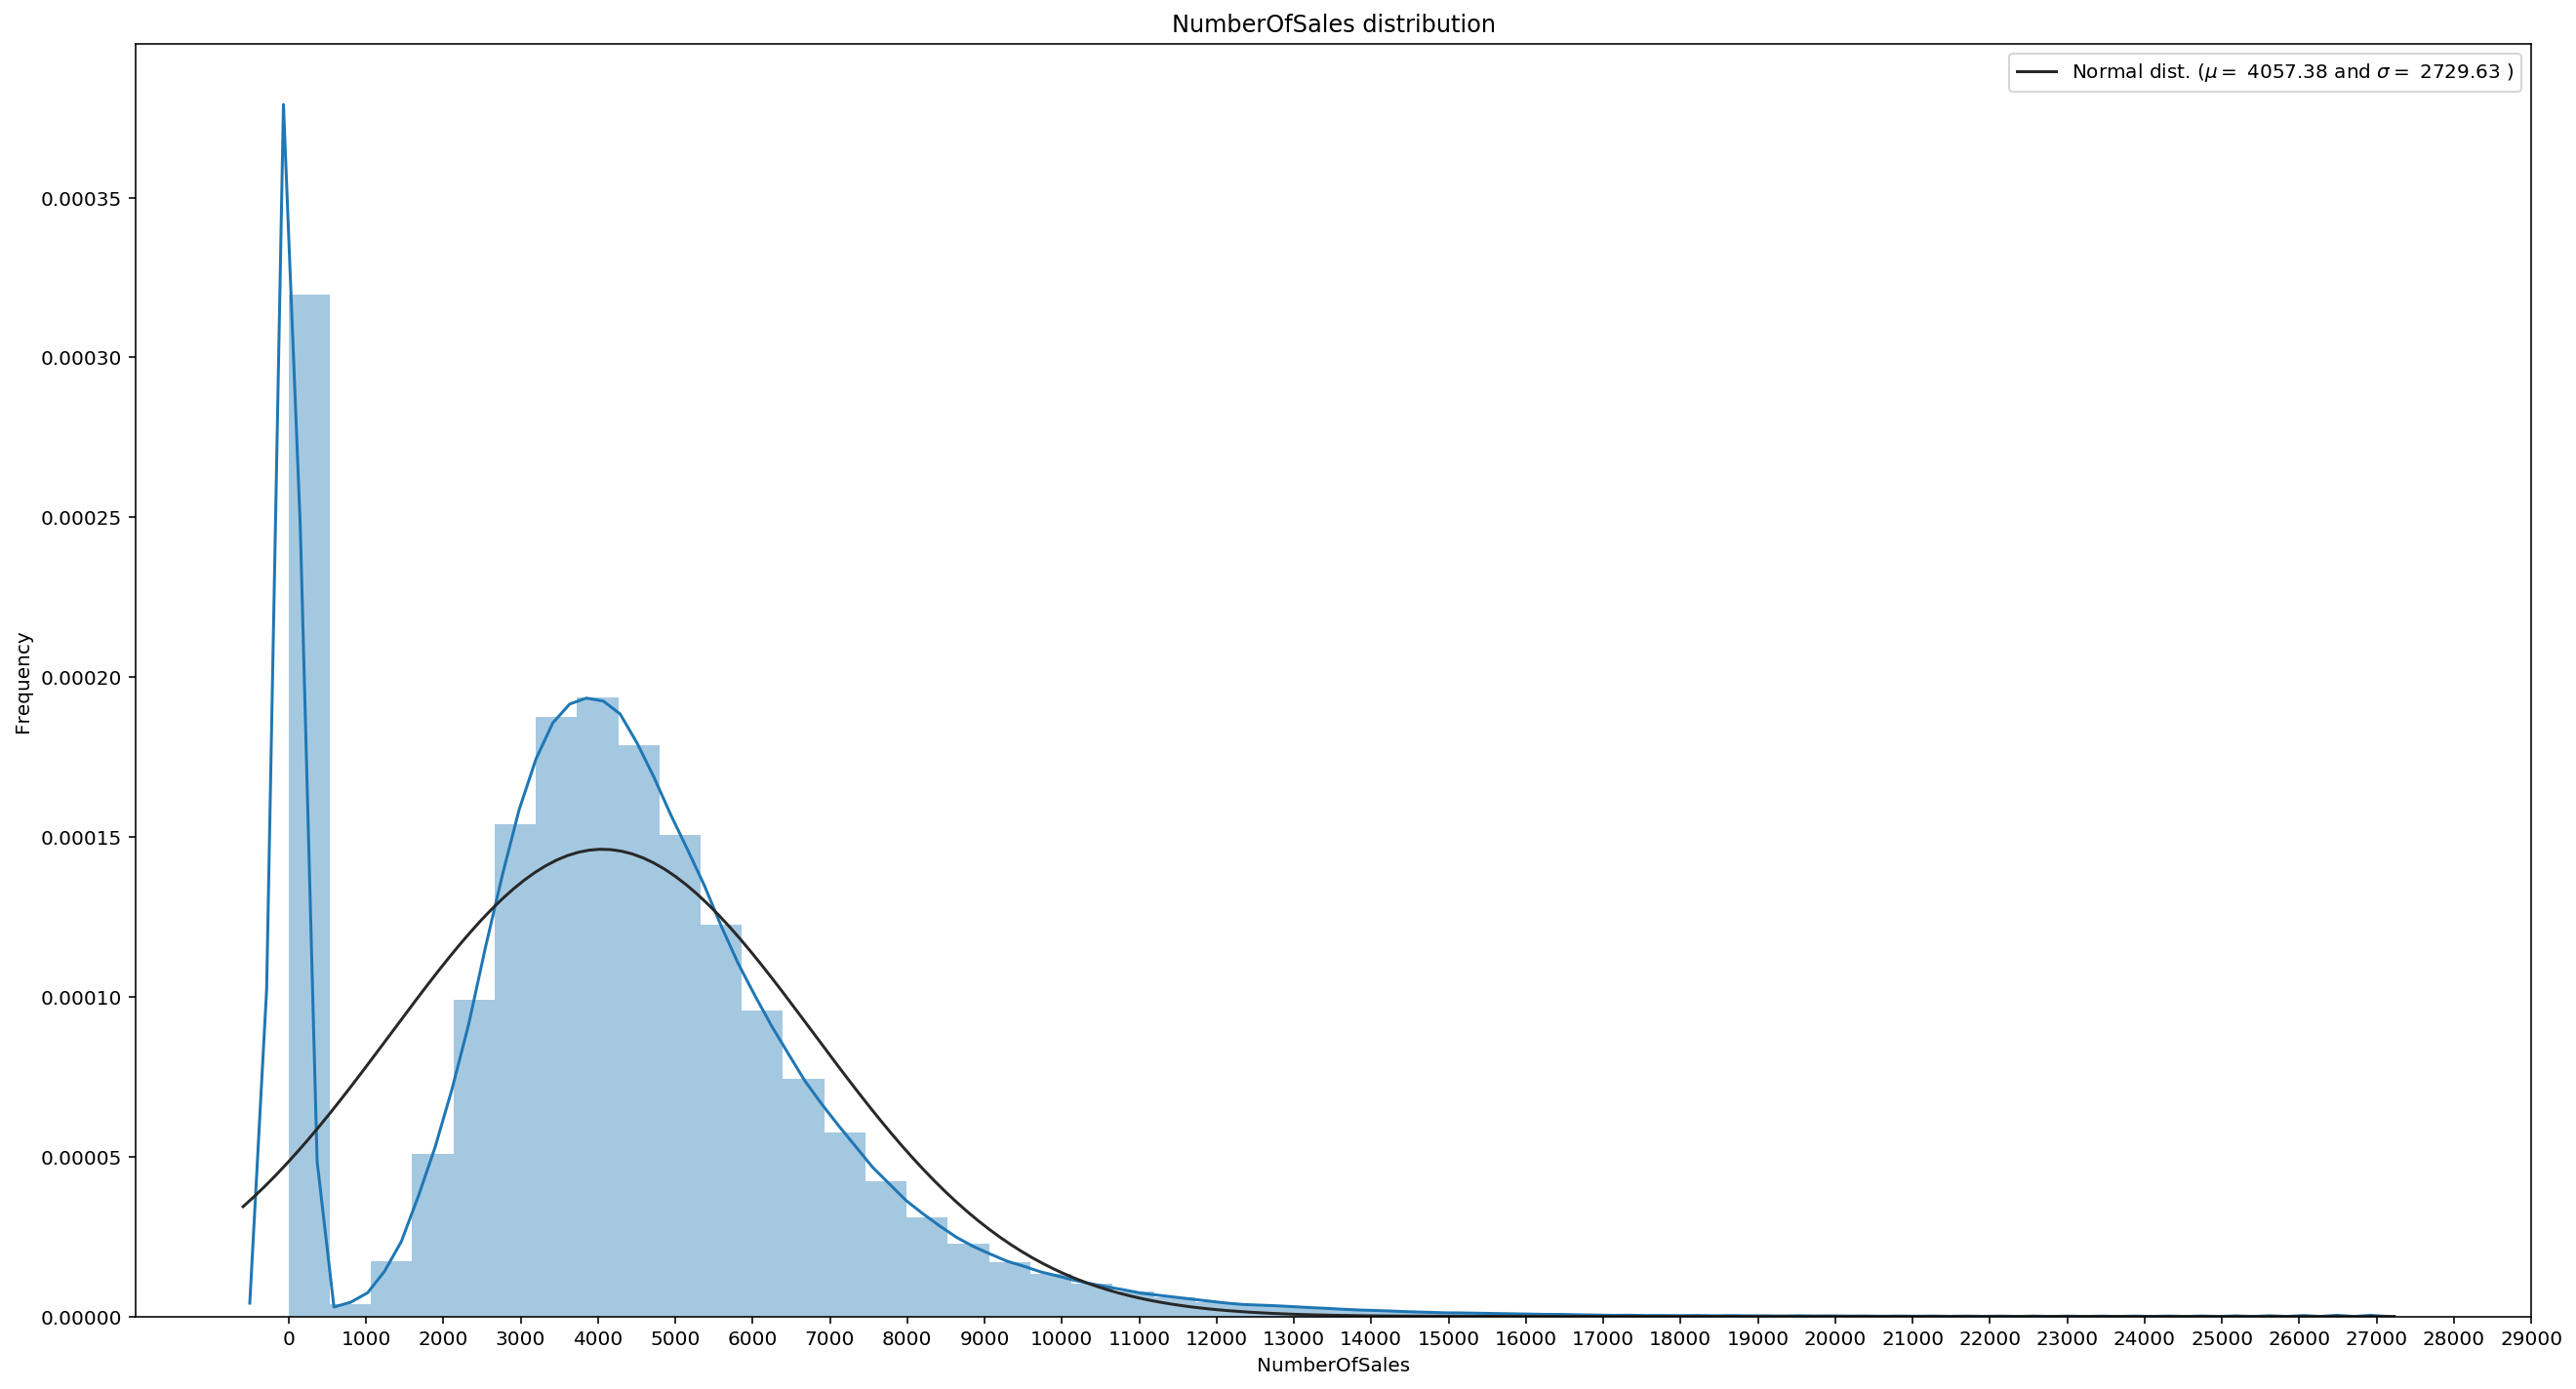

In [10]:
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0)
# fit the data with a normal distribution and 
sns.distplot(df['NumberOfSales'] , fit=norm)

(mu, sigma) = norm.fit(df['NumberOfSales'])
print( '\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma)) #Le graffe servono per creare la format string
print("Skewness: %f" % df['NumberOfSales'].skew())
print("Kurtosis: %f" % df['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')
_ = plt.xticks(np.arange(0, 30000, step=1000)) #l'assegnamento all'inizio serve per non fare stampare l'output

As we  can see there is an high frequency of **low** number of sales. We should go in deep to understand the reasons of this phenomenon.

### Cleaned dataset


mu = 4057.38 and sigma = 2729.63

Skewness: 0.655949
Kurtosis: 1.756632


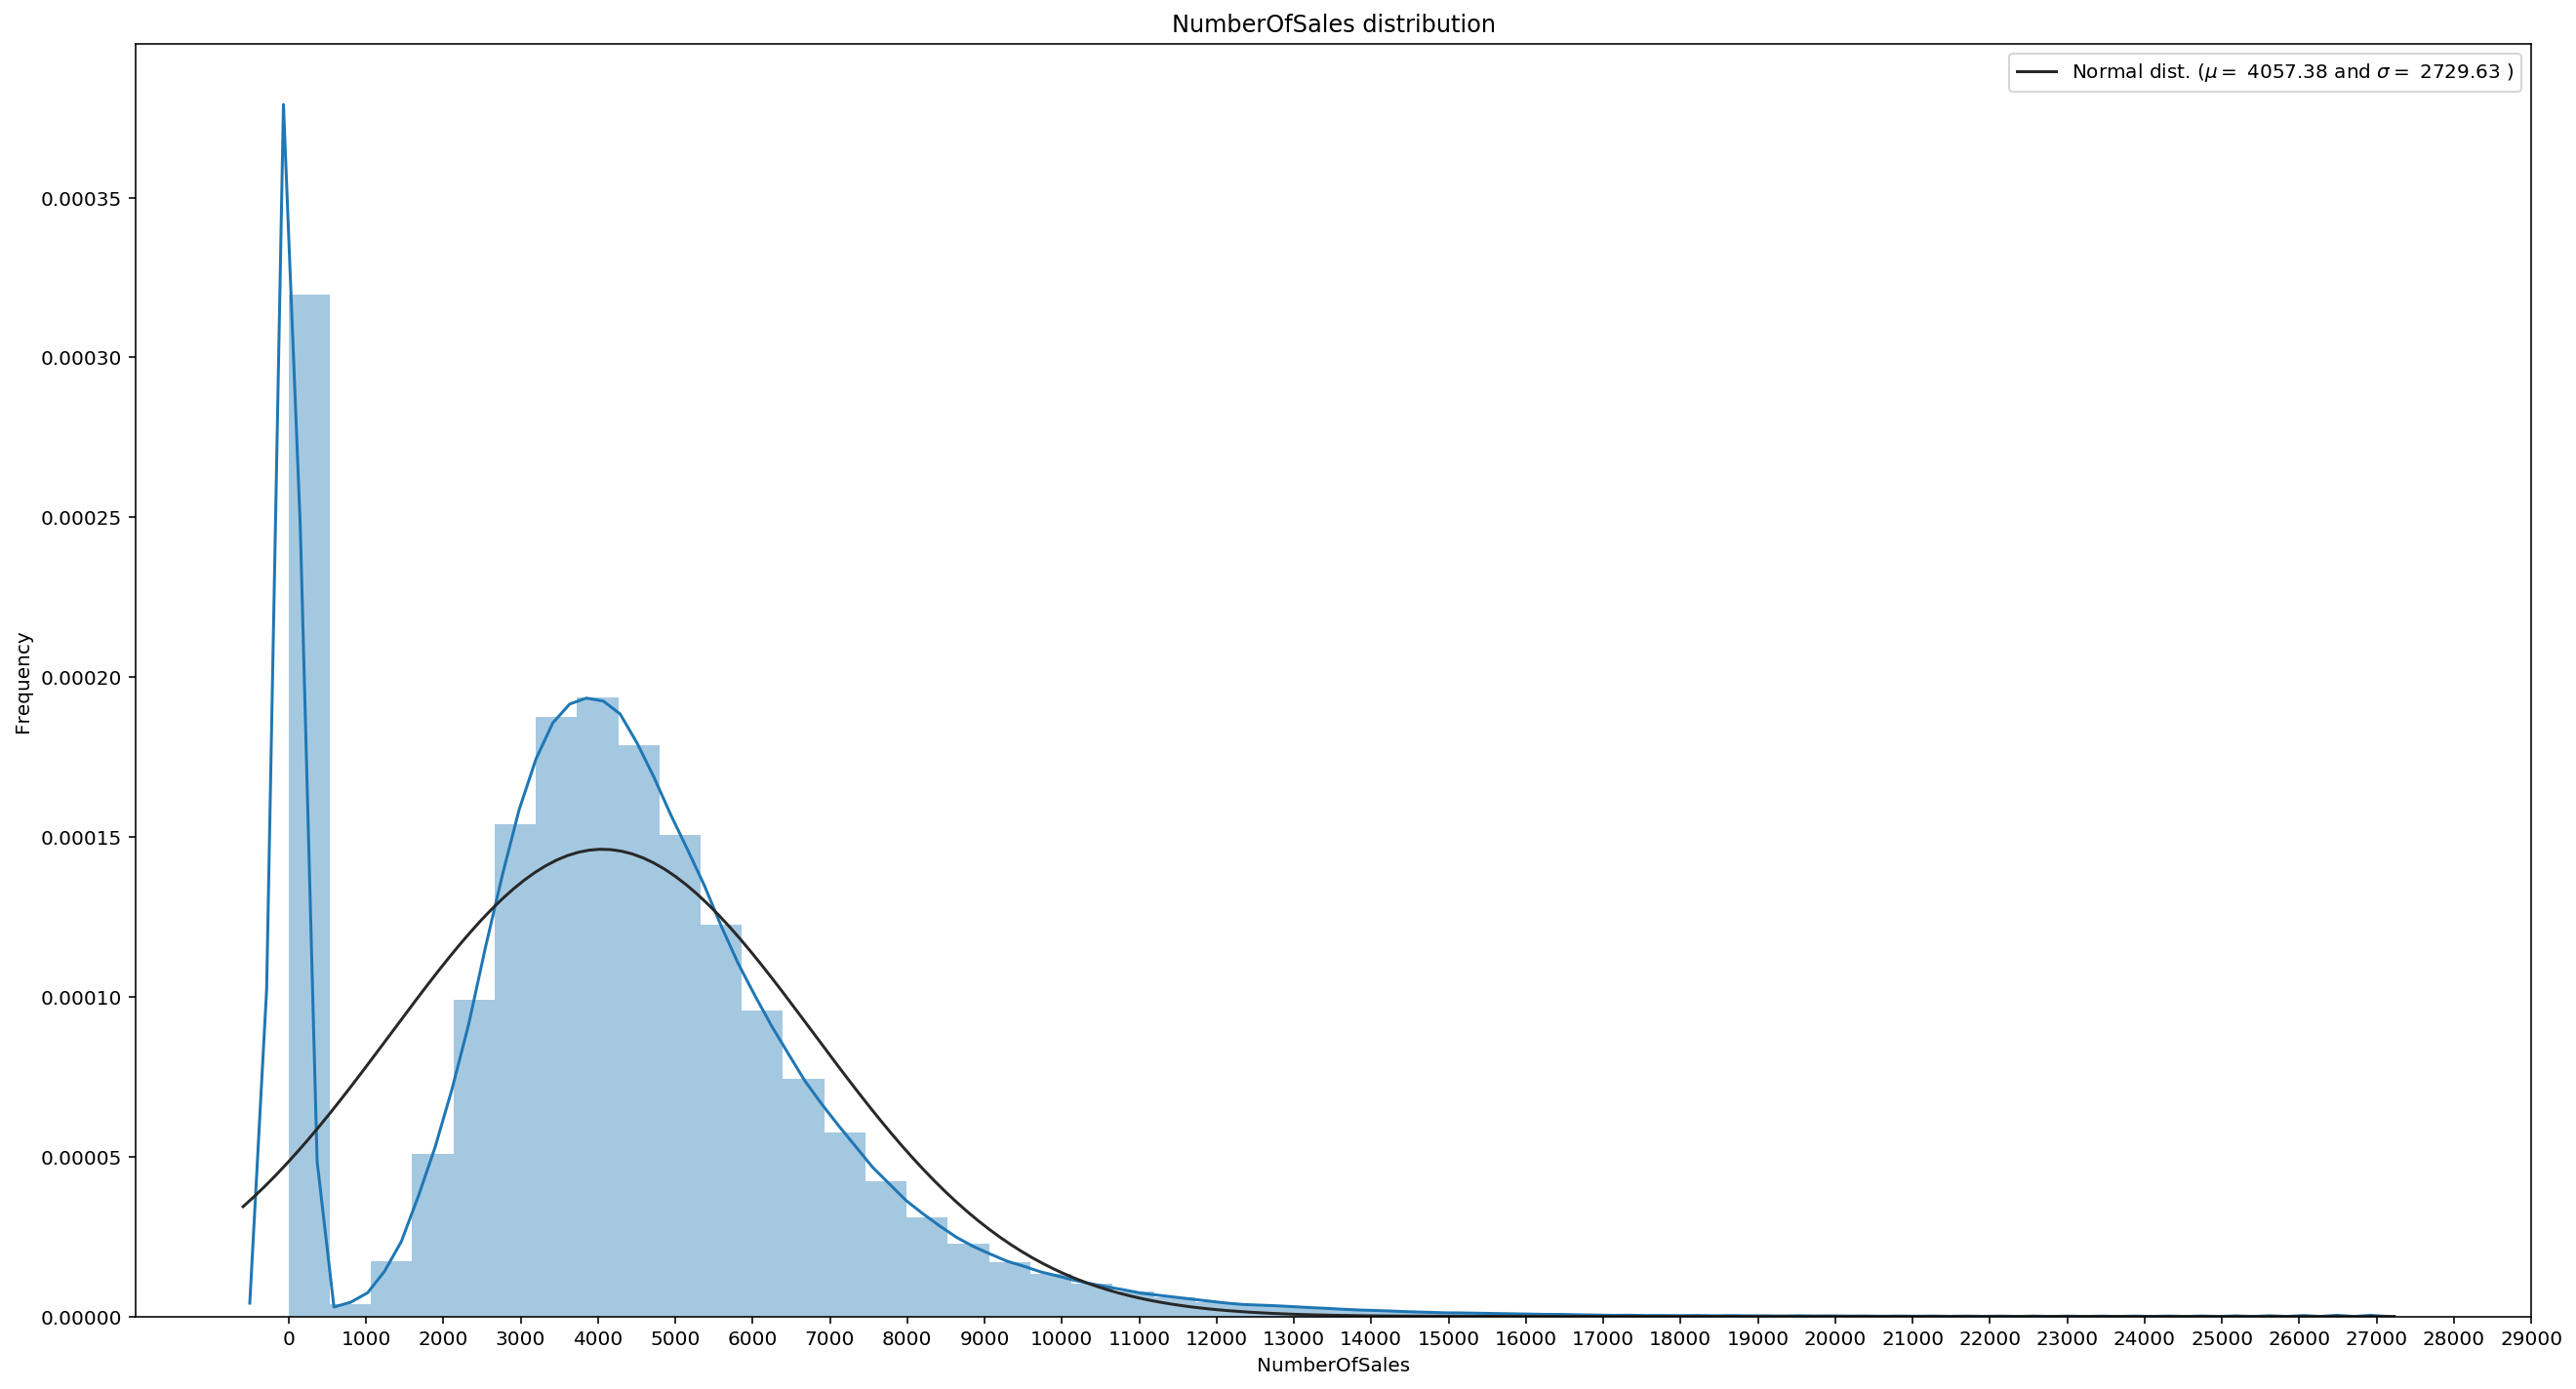

In [11]:
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0)
# fit the data with a normal distribution and 
sns.distplot(df_deleted_columns['NumberOfSales'] , fit=norm)

(mu, sigma) = norm.fit(df_deleted_columns['NumberOfSales'])
print( '\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma)) #Le graffe servono per creare la format string
print("Skewness: %f" % df_deleted_columns['NumberOfSales'].skew())
print("Kurtosis: %f" % df_deleted_columns['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')
_ = plt.xticks(np.arange(0, 30000, step=1000)) #l'assegnamento all'inizio serve per non fare stampare l'output

In [12]:
low_numberofsales = df.loc[df['NumberOfSales'] < 500]
high_numberofsales = df.loc[df['NumberOfSales'] > 500]

A statistical description of the instances with a NumberOfSales less than 500

In [13]:
low_numberofsales.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,...,89116.000000,87036.000000,89116.000000,89116.000000,89116.000000,89116.000000,89116.000000,87036.000000,89116.000000,89116.000000
mean,1374.072052,0.169812,0.000595,0.060786,7806.503423,5.643442,0.008629,0.099084,12711.060999,14074.026965,...,9.968625,12.173859,11.984930,3.438316,51.501391,1012.200559,5.994793,7.084344,0.843646,179.493716
std,217.130480,0.375470,0.024380,0.238939,11026.952750,3.357265,0.576294,6.614012,9260.031519,2730.985161,...,6.998007,4.861304,5.733488,6.079839,18.995532,8.597819,6.311125,4.772251,2.556647,103.757893
min,1000.000000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-12.000000,0.000000,3.000000,-18.000000,11.000000,977.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,0.000000,0.000000,1043.000000,2.000000,0.000000,0.000000,7215.000000,11849.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,85.000000
50%,1375.000000,0.000000,0.000000,0.000000,3351.000000,6.000000,0.000000,0.000000,9643.000000,15017.000000,...,10.000000,11.000000,11.000000,4.000000,52.000000,1013.000000,6.000000,8.000000,0.000000,207.000000
75%,1562.000000,0.000000,0.000000,0.000000,9586.000000,9.000000,0.000000,0.000000,15566.000000,15931.000000,...,15.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,261.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.000000,10.000000,44.000000,495.000000,32221.000000,23931.000000,...,30.000000,31.000000,40.000000,17.000000,100.000000,1035.000000,24.000000,31.000000,58.930000,360.000000


In [14]:
percentage_low_numberofsales = round(low_numberofsales.shape[0] / n_instances * 100, 3)
print("The percentage of instances that have a NumberOfSales less than 500 is %.3f%%." %percentage_low_numberofsales)

The percentage of instances that have a NumberOfSales less than 500 is 17.039%.


The dataset cleaned of instances with NumberOfSales less than 500


mu = 4057.38 and sigma = 2729.63

Skewness: 1.560391
Kurtosis: 4.695395


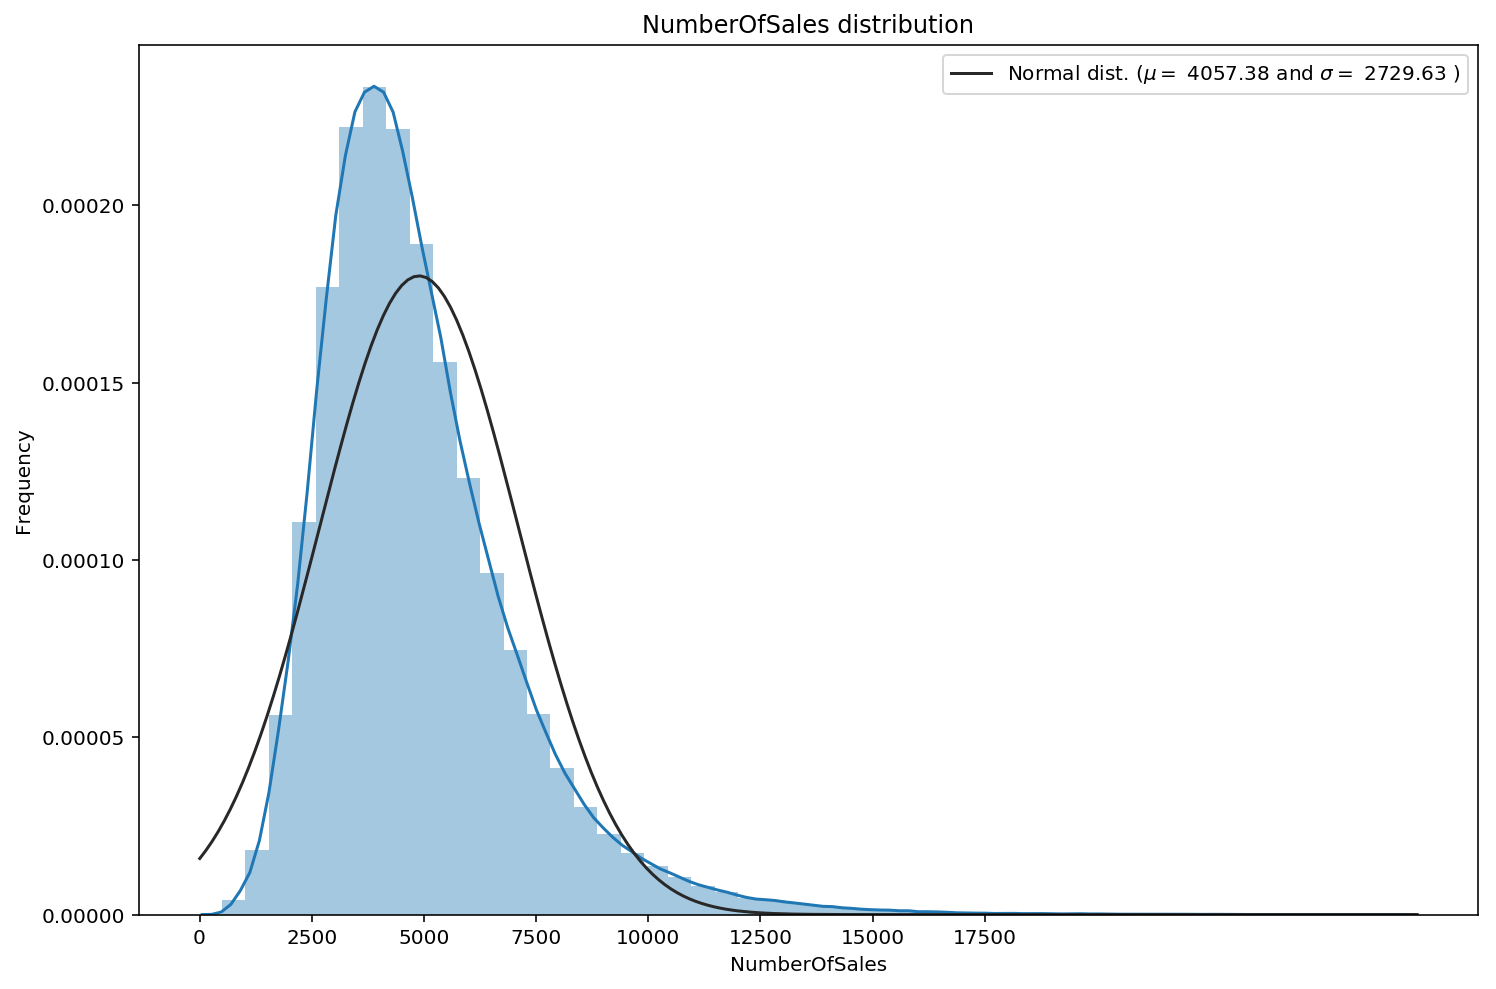

In [15]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
# fit the data with a normal distribution and 
sns.distplot(high_numberofsales['NumberOfSales'] , fit=norm)

(mu, sigma) = norm.fit(df_deleted_columns['NumberOfSales'])
print( '\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma)) #Le graffe servono per creare la format string
print("Skewness: %f" % high_numberofsales['NumberOfSales'].skew())
print("Kurtosis: %f" % high_numberofsales['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')
_ = plt.xticks(np.arange(0, 20000, step=2500)) #l'assegnamento all'inizio serve per non fare stampare l'output

We can normalize the data.

/home/irons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



 mu = 8.40 and sigma = 0.43

Skewness: -0.127125
Kurtosis: 0.524235


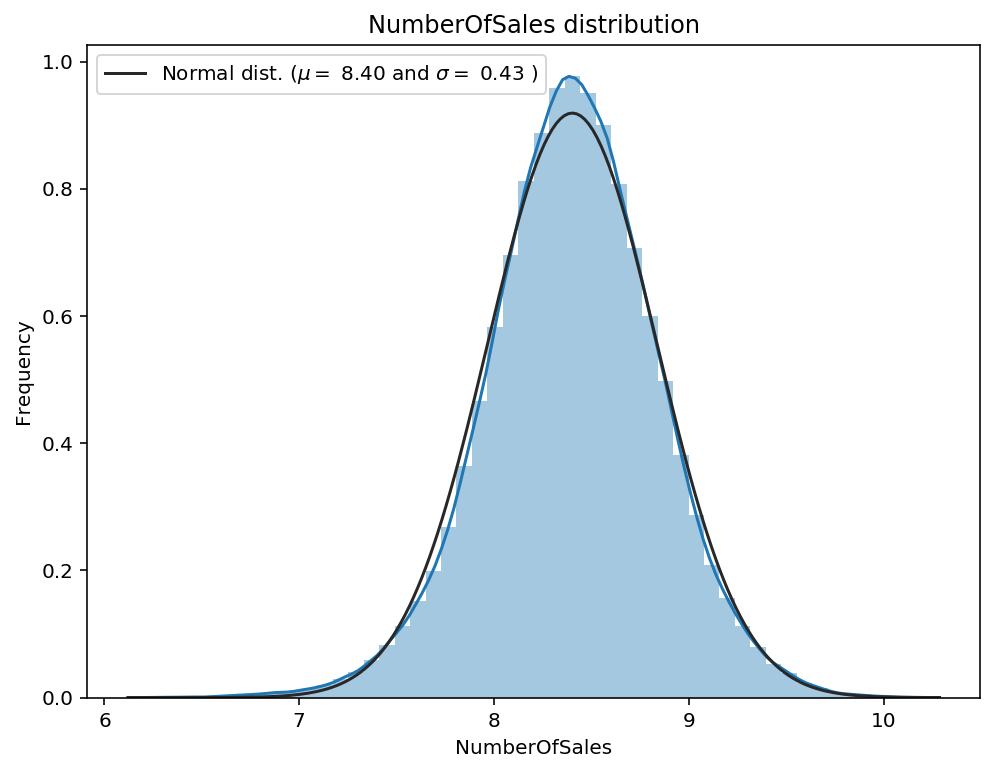

In [16]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
high_numberofsales["NumberOfSales"] = np.log1p(high_numberofsales["NumberOfSales"])
(mu, sigma) = norm.fit(high_numberofsales["NumberOfSales"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % high_numberofsales["NumberOfSales"].skew())
print("Kurtosis: %f" % high_numberofsales["NumberOfSales"].kurt())

matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
sns.distplot(high_numberofsales["NumberOfSales"] , fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
_ = plt.title('NumberOfSales distribution')

Now, we can analyse the stores.

## Data cleaning

After the exploration of the data, we start cleaning the data. First of all, we delete the Region ID because it's possible to obtain it from other parameters.

In [17]:
df = df.drop(labels='Region', axis=1)

df["StoreType"] = df["StoreType"].map({'Standard Market': 0, 'Super Market': 1, 'Hyper Market': 2, 'Shopping Center': 3})

df = pd.get_dummies(df, columns=['AssortmentType'])

In [18]:
for e in ['Rain', 'Snow', 'Fog', 'Hail', 'Thunderstorm']:
    df[e] = df.loc[:, 'Events'].astype('str').apply(lambda x: int(e in x))
    
df = df.drop(labels='Events', axis=1)

In [19]:
def is_saturday(day):
    return int(datetime.datetime.strptime(day, '%d/%m/%Y').weekday() == 5)

def is_sunday(day):
    return int(datetime.datetime.strptime(day, '%d/%m/%Y').weekday() == 6)

df['IsSaturday'] = df['Date'].map(is_saturday)
df['IsSunday'] = df['Date'].map(is_sunday)

In [37]:
gust_not_null = df.dropna(subset=['Max_Gust_SpeedKm_h'])
gust_wind_ratio = gust_not_null['Max_Gust_SpeedKm_h'].mean() / gust_not_null['Max_Wind_SpeedKm_h'].mean()

def predict_gust(x):
    gust = x['Max_Gust_SpeedKm_h']
    wind = x['Max_Wind_SpeedKm_h']
    
    new_gust = 0.0
    
    if np.isnan(gust):
        new_gust = gust_wind_ratio * wind
    else:
        new_gust = gust
    
    return new_gust

df['Max_Gust_SpeedKm_h'] = df.loc[:, ['Max_Gust_SpeedKm_h', 'Max_Wind_SpeedKm_h']].apply(predict_gust, axis=1)

In [64]:
cloud_cover_not_null   = df.dropna(subset=['CloudCover'])
cloud_humidity_ratio   = cloud_cover_not_null['CloudCover'].mean() / cloud_cover_not_null['Min_Humidity'].mean()

def predict_cloud_cover(x):
    cloud_cover = x['CloudCover']
    humidity = x['Min_Humidity']
    
    new_cloud = 0.0
    
    if np.isnan(cloud_cover):
        new_cloud = humidity * cloud_humidity_ratio
    else:
        new_cloud = cloud_cover
    
    return new_cloud

df['CloudCover'] = df.loc[:, ['CloudCover', 'Min_Humidity']].apply(predict_cloud_cover, axis=1)